In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load and preprocess the image
img_path = r'C:\Users\DHRUV\OneDrive\Desktop\CNN Images\Dog.jpg'
img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to 150x150
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values to [0, 1] range

# Assuming your dataset is loaded into X_data and y_data
# Example: Replace this with your actual dataset loading code
X_data = np.random.random((100, 150, 150, 3))  # Example random data
y_data = np.random.randint(0, 3, (100,))  # Example random labels

# 3. Splitting Data into Training, Validation, and Test Sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# 4. Label Encoding (if necessary)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# 5. One-Hot Encoding of Labels
y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# 6. Define the model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# 7. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 8. Model Training
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val, y_val_one_hot))

# 9. Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.4086 - loss: 2.5400 - val_accuracy: 0.1000 - val_loss: 1.9600
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.3562 - loss: 1.3075 - val_accuracy: 0.5000 - val_loss: 0.9810
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.3508 - loss: 1.1681 - val_accuracy: 0.1000 - val_loss: 1.1700
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.3523 - loss: 1.0869 - val_accuracy: 0.1000 - val_loss: 1.2324
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3562 - loss: 1.1002 - val_accuracy: 0.1000 - val_loss: 1.2136
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.3953 - loss: 1.0828 - val_accuracy: 0.1000 - val_loss: 1.1845
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3914 - loss: 1.0707 - val_accuracy: 0.1000 - val_loss: 1.1515
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3953 - loss: 1.0725 - val_accuracy: 0.1000 - val_loss:

In [54]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(8,(3,3),activation ='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(16,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(3,activation='softmax')    
 ])

In [55]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 148, 148, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 72, 72, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 36, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 34, 34, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1024)           │     9,470,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,003,347 (38.16 MB)

 Trainable params: 10,003,347 (38.16 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_27',
 'max_pooling2d_27',
 'conv2d_28',
 'max_pooling2d_28',
 'conv2d_29',
 'max_pooling2d_29',
 'flatten_9',
 'dense_27',
 'dense_28',
 'dense_29']

In [57]:
model.layers

[<Conv2D name=conv2d_27, built=True>,
 <MaxPooling2D name=max_pooling2d_27, built=True>,
 <Conv2D name=conv2d_28, built=True>,
 <MaxPooling2D name=max_pooling2d_28, built=True>,
 <Conv2D name=conv2d_29, built=True>,
 <MaxPooling2D name=max_pooling2d_29, built=True>,
 <Flatten name=flatten_9, built=True>,
 <Dense name=dense_27, built=True>,
 <Dense name=dense_28, built=True>,
 <Dense name=dense_29, built=True>]

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val, y_val_one_hot))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.4383 - loss: 3.6556 - val_accuracy: 0.5000 - val_loss: 1.4300
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.3523 - loss: 2.3956 - val_accuracy: 0.4000 - val_loss: 1.0739
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.2672 - loss: 1.2144 - val_accuracy: 0.1000 - val_loss: 1.6380
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.4383 - loss: 1.1081 - val_accuracy: 0.5000 - val_loss: 1.0486
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.3664 - loss: 1.1670 - val_accuracy: 0.5000 - val_loss: 1.0076
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.3133 - loss: 1.1519 - val_accuracy: 0.1000 - val_loss: 1.2225
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.4031 - loss: 1.0906 - val_accuracy: 0.1000 - val_loss: 1.2831
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4187 - loss: 1.0925 - val_accuracy: 0.1000 - val_loss:

In [60]:
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 1.0516
Test Loss: 1.0515881776809692, Test Accuracy: 0.5


In [61]:
input_tensor = tf.keras.Input(shape=(150, 150, 3))

In [62]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor shape=(None, 148, 148, 8), dtype=float32, sparse=False, name=keras_tensor_102>,
 <KerasTensor shape=(None, 74, 74, 8), dtype=float32, sparse=False, name=keras_tensor_103>,
 <KerasTensor shape=(None, 72, 72, 16), dtype=float32, sparse=False, name=keras_tensor_104>,
 <KerasTensor shape=(None, 36, 36, 16), dtype=float32, sparse=False, name=keras_tensor_105>,
 <KerasTensor shape=(None, 34, 34, 32), dtype=float32, sparse=False, name=keras_tensor_106>,
 <KerasTensor shape=(None, 17, 17, 32), dtype=float32, sparse=False, name=keras_tensor_107>,
 <KerasTensor shape=(None, 9248), dtype=float32, sparse=False, name=keras_tensor_108>,
 <KerasTensor shape=(None, 1024), dtype=float32, sparse=False, name=keras_tensor_109>,
 <KerasTensor shape=(None, 512), dtype=float32, sparse=False, name=keras_tensor_110>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_111>]

In [65]:
# Get the input layer of the model
input_layer = model.layers[0].input

# Create feature map model directly from the existing model
feature_map_model = tf.keras.models.Model(inputs=input_layer, outputs=[layer.output for layer in model.layers])


In [67]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = r"C:\Users\DHRUV\OneDrive\Desktop\CNN Images\Dog.jpg"
img = load_img(image_path, target_size=(150, 150))  # Load image
input_array = img_to_array(img)  # Convert image to array
input_array = input_array.reshape((1,) + input_array.shape)  # Reshape array
input_array /= 255.0  # Normalize pixel values to [0, 1]


In [69]:
feature_maps = feature_map_model.predict(input_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


In [70]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d_27 is =======>> (1, 148, 148, 8)
The shape of the max_pooling2d_27 is =======>> (1, 74, 74, 8)
The shape of the conv2d_28 is =======>> (1, 72, 72, 16)
The shape of the max_pooling2d_28 is =======>> (1, 36, 36, 16)
The shape of the conv2d_29 is =======>> (1, 34, 34, 32)
The shape of the max_pooling2d_29 is =======>> (1, 17, 17, 32)
The shape of the flatten_9 is =======>> (1, 9248)
The shape of the dense_27 is =======>> (1, 1024)
The shape of the dense_28 is =======>> (1, 512)
The shape of the dense_29 is =======>> (1, 3)


In [72]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        # Process the feature map
        print(f"Layer Name: {layer_name}, Feature Map Shape: {feature_map.shape}")
        # Add your processing code here


Layer Name: conv2d_27, Feature Map Shape: (1, 148, 148, 8)
Layer Name: max_pooling2d_27, Feature Map Shape: (1, 74, 74, 8)
Layer Name: conv2d_28, Feature Map Shape: (1, 72, 72, 16)
Layer Name: max_pooling2d_28, Feature Map Shape: (1, 36, 36, 16)
Layer Name: conv2d_29, Feature Map Shape: (1, 34, 34, 32)
Layer Name: max_pooling2d_29, Feature Map Shape: (1, 17, 17, 32)


In [74]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        # Number of feature images/dimensions in a feature map of a layer 
        k = feature_map.shape[-1]  

        # iterating over a feature map of a particular layer to separate all feature images
        for i in range(k):
            feature_image = feature_map[0, :, :, i]
            # Process each feature image
            # Add your processing code here


In [76]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        # Number of feature images/dimensions in a feature map of a layer 
        k = feature_map.shape[-1]  

        # iterating over a feature map of a particular layer to separate all feature images
        for i in range(k):
            feature_image = feature_map[0, :, :, i]

            # Normalize the feature image
            feature_image -= feature_image.mean()
            feature_image /= feature_image.std()
            feature_image *= 64
            feature_image += 128

            # Clip the values to [0, 255] and convert to unsigned 8-bit integer
            feature_image = np.clip(feature_image, 0, 255).astype('uint8')

            # Process each feature image
            # Add your processing code here


C:\Users\DHRUV\AppData\Local\Temp\ipykernel_24512\3703877371.py:12: RuntimeWarning: invalid value encountered in divide
  feature_image /= feature_image.std()
C:\Users\DHRUV\AppData\Local\Temp\ipykernel_24512\3703877371.py:17: RuntimeWarning: invalid value encountered in cast
  feature_image = np.clip(feature_image, 0, 255).astype('uint8')


C:\Users\DHRUV\AppData\Local\Temp\ipykernel_24512\1280041962.py:18: RuntimeWarning: invalid value encountered in cast
  feature_image = np.clip(feature_image, 0, 255).astype('uint8')


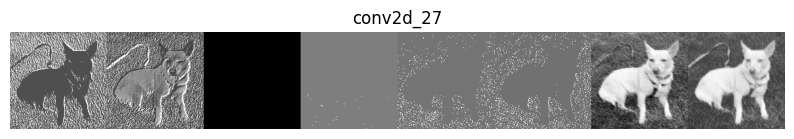

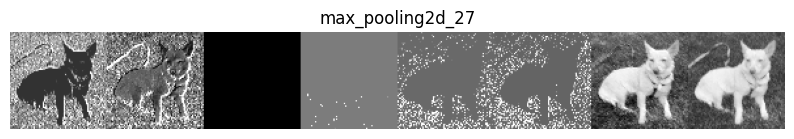

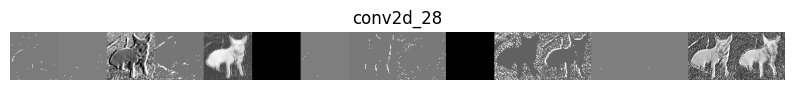

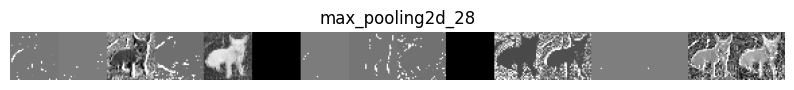

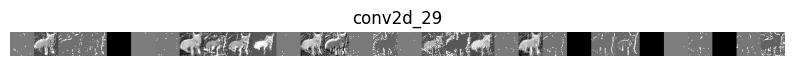

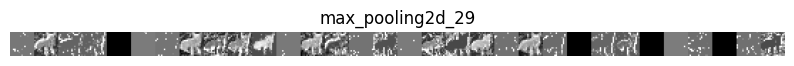

In [79]:

import matplotlib.pyplot as plt
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:
        k = feature_map.shape[-1]
        size = feature_map.shape[1]
        image_belt = np.zeros((size, k * size))

        for i in range(k):
            feature_image = feature_map[0, :, :, i]

            # Normalize the feature image
            feature_image -= feature_image.mean()
            feature_image /= feature_image.std()
            feature_image *= 64
            feature_image += 128

            # Clip the values to [0, 255] and convert to unsigned 8-bit integer
            feature_image = np.clip(feature_image, 0, 255).astype('uint8')

            # Concatenate the feature images horizontally
            image_belt[:, i * size: (i + 1) * size] = feature_image

        # Visualize the concatenated feature maps
        plt.figure(figsize=(10, 10))
        plt.imshow(image_belt, cmap='gray')
        plt.title(layer_name)
        plt.axis('off')
        plt.show()


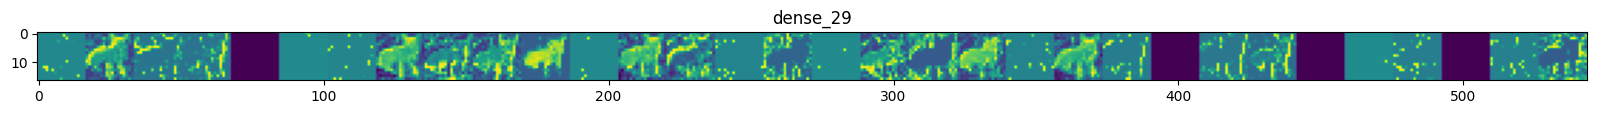

In [80]:
    scale = 20. / k
    plt.figure( figsize=(scale * k, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( image_belt, aspect='auto')